## Análise de Dados LEGAL - VIA - Modelo Desindexado


In [1]:
#Carga das bibliotecas utilizadas no estudo

import pandas as pd

#biblioteca para gráficos mais amigáveis
import seaborn as sns

#carrega módulo decision tree
from sklearn import tree

#Carrega métricas de avaliação de modelos
#Para modelos de regressão utilizamos R-quadrado, MAPE e MAE
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error
#Para modelos de classificação utilizamos Acurácia, curva ROC / AUC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

#carrega módulo para tratar variáveis categóricas. trabalhando com modelos de árvore podemos usar o Label Encoder
from sklearn import preprocessing

#ANOVA - teste de independência entre variável categórica e contínua
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Biblioteca para exibição gráfica do resultado da árvore de decisão treinada
import graphviz

#força o pandas a mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

#força o pandas a mostrar todas as linhas do dataframe
#pd.set_option("max_rows", None)

In [2]:
#Carga da base de Dados
dados = pd.read_excel("C:/Users/2104998693/Desktop/Novo Histórico 20_10.xlsx")

dados

,ID_PROCESSO,CADASTRO,MES_CADASTRO,AREA_DO_DIREITO,SUB_AREA_DO_DIREITO,VALOR_DA_CAUSA,ESCRITORIO_RESPONSAVEL,PARTE_CONTRARIA_CPF,PARTE_CONTRARIA_NOME,PROCESSO_ESTEIRA,ESTADO,COMARCA,CLASSIFICACAO,NATUREZA_OPERACIONAL,DATA_ADMISSAO,MES_DATA_ADMISSAO,DATA_DISPENSA,MES_DATA_DISPENSA,DISTRIBUICAO,DISTRIBUICAO (ajustada),PARTE_CONTRARIA_CARGO_GRUPO,FASE,FILIAL,BAND,NOME_DA_LOJA,TIPO_BAND,ENCERRADOS,MOTIVO_ENCERRAMENTO,MES_FECH,MATRICULA,ACORDO,CONDENACAO,GARANTIA,PENHORA,IMPOSTO,OUTROS_PAGAMENTOS,TOTAL_PAGAMENTOS,MOTIVO_ENC_AGRP,CARGO AJUSTADO,Tempo de Empresa,Cluster Aging Tempo de Empresa,MESES_AGING_ENCERR,Cluster Aging,Safra de Reclamação,TERCEIRO PRINCIPAL,ET,Distribuição,Data ULT_PGTO,Desindexador,Pagamento Desindexado,OUTLIER
0,7562,2010-10-25,2010-10-01,TRABALHISTA,PREVENTIVO AUTO DE INFRAÇÃO,0.00,HASSAN E KOHATSU SOCIEDADE DE ADVOGADOS,N/I,MINISTERIO DO TRABALHO E EMPREGO - GLOBEX GPA ...,ESTRATÉGICO (TRABALHISTA),RJ,RIO DE JANEIRO,MTE,SINDICATO / MINISTERIO PUBLICO,2010-10-11 00:00:00,2010-10-01 00:00:00,2010-10-11 00:00:00,2010-10-01 00:00:00,2010-10-11 00:00:00,2010-10-01,N/D,EXECUÇÃO,0650,NaN,NaN,NaN,1,ARQUIVADO,2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEM ONUS,OUTROS,0.0,Até 1 ano,119,+7 ANOS,2010,NaN,Sem info,2010-10-01,2020-07-01,3.472248,0.000000,Outlier
1,7630,2011-05-02,2011-05-01,TRABALHISTA,PREVENTIVO AUTO DE INFRAÇÃO,0.00,HASSAN E KOHATSU SOCIEDADE DE ADVOGADOS,37.115.367/0035-00,MINISTERIO DO TRABALHO E EMPREGO,ESTRATÉGICO (TRABALHISTA),MT,MATUPÁ,MTE,SINDICATO / MINISTERIO PUBLICO,NaN,NaN,NaN,NaN,2011-05-02 00:00:00,2011-05-01,SINDICATO / MPT,NaN,0650,NaN,NaN,NaN,1,ARQUIVADO,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEM ONUS,OUTROS,NaN,Sem info,108,+7 ANOS,Sem info,NaN,Sem info,2011-05-01,2020-03-01,3.096638,0.000000,Outlier
2,9229,2010-02-04,2010-02-01,TRABALHISTA,PREVENTIVO AUTO DE INFRAÇÃO,0.00,ADVOGADO INTERNO VV (ANTIGA CBD),NI,MINISTERIO DO TRABALHO E EMPREGO,ESTRATÉGICO (TRABALHISTA),SP,OSASCO,PRÓPRIO,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N/D,NaN,0650,NaN,NaN,NaN,1,ARQUIVADO,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEM ONUS,OUTROS,NaN,Sem info,122,+7 ANOS,Sem info,NaN,Sem info,2010-02-01,2020-02-01,3.594138,0.000000,Outlier
3,9366,2015-12-11,2015-12-01,TRABALHISTA,CONTENCIOSO COLETIVO,0.00,HASSAN E KOHATSU SOCIEDADE DE ADVOGADOS,042.422.287-67,MINISTÉRIO PÚBLICO DO TRABALHO - 03/07/2015 - ...,ESTRATÉGICO (TRABALHISTA),SP,CAJAMAR,MPT,SINDICATO / MINISTERIO PUBLICO,2015-07-03 00:00:00,2015-07-01 00:00:00,2016-08-31 00:00:00,2016-08-01 00:00:00,2015-07-03 00:00:00,2015-07-01,SINDICATO / MPT,CONHECIMENTO,1102,NaN,NaN,NaN,1,ARQUIVADO,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEM ONUS,OUTROS,13.0,1 - 2 anos,62,5 - 6 ANOS,2015,NaN,Sem info,2015-07-01,2021-01-01,2.022005,0.000000,Outlier
4,10121,2009-10-26,2009-10-01,TRABALHISTA,CONTENCIOSO INDIVIDUAL,30000.00,DÉCIO FREIRE ADVOGADOS (TRABALHISTA),585.654.181-20,HUMBERTO CALDAS DE ARAÚJO,MASSA (TRABALHISTA),GO,GOIÂNIA,PRÓPRIO,NaN,2007-06-01 00:00:00,2007-06-01 00:00:00,2008-09-01 00:00:00,2008-09-01 00:00:00,2009-10-22 00:00:00,2009-10-01,VENDEDOR,EXECUÇÃO,650,NaN,NaN,NaN,1,ARQUIVADO,2019-10-01,GPA,NaN,NaN,45118.46,NaN,NaN,NaN,45118.46,CONDENACAO,VENDEDOR,15.0,1 - 2 anos,122,+7 ANOS,2007,NaN,Sem info,2009-10-01,2019-10-01,3.594138,12553.345374,Hábil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27424,953071,2021-08-23,2021-08-01,TRABALHISTA,CONTENCIOSO INDIVIDUAL,100430.53,"AUTUORI, BURMANN SOCIEDADE DE ADVOGADOS",402.356.288-24,CICERO ELIAS DE ALMEIDA SOUZA,MASSA (TRABALHISTA),SP,SÃO PAULO - PENHA DE FRANÇA,PRÓPRIO,OPERACIONAL,2019-01-07 00:00:00,2019-01-01 00:00:00,2020-03-06 00:00:00,2020-03-01 00:00:00,2021-08-17 00:00:00,2021-08-01,AUXILIAR,RECURSAL TRT,1290,CB,JD. IGUATEMI 2 - SP,LOJA,1,NaN,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEM ONUS,AUXILIAR,14.0,1 - 2 anos,1,ATÉ 1 ANO,2019,NaN,Sem info,2021

In [4]:
estoque = pd.read_excel("C:/Users/2104998693/Desktop/Modelagem/FECHAMENTO_TRAB_20220216_4.xlsx")

estoque

,LINHA,ID PROCESSO,PASTA,Área do Direito,Sub-área do Direito,Grupo (M-1),Empresa (M-1),Grupo (M),Empresa (M),STATUS (M-1),STATUS (M),Centro de Custo (M-1),Centro de Custo (M),Cadastro,Reabertura,Objeto Assunto/Cargo (M-1),Sub Objeto Assunto/Cargo (M-1),Objeto Assunto/Cargo (M),Sub Objeto Assunto/Cargo (M),Órgão ofensor (Fluxo) (M-1),Órgão ofensor (Fluxo) (M),Natureza Operacional (M-1),Natureza Operacional (M),Média de Pagamento,% Risco,Distribuição,Nº Processo,Escritorio,Vlr Causa,% Sócio (M-1),% Empresa (M-1),% Sócio (M),% Empresa (M),Provisão (M-1),Correção (M-1),Provisão Total (M-1),Classificação Mov. (M),Provisão Mov. (M),Correção Mov. (M),Provisão Mov. Total (M),Provisão Total (M),Correção (M-1),Correção (M),Provisão Total Passivo (M),Socio: Provisão (M-1),Socio: Correção (M-1),Socio: Provisão Total (M-1),SOCIO: Classificação Mov. (M),SOCIO: Provisão Mov. (M),SOCIO: Correção Mov. (M),SOCIO: Provisão Mov. Total (M),SOCIO: Provisão Total (M),SOCIO: Correção (M-1)_0001,SOCIO: Correção (M),SOCIO: Prov. Total Passivo (M),Empresa: Provisão (M-1),Empresa: Correção (M-1),Empresa: Provisão Total (M-1),EMPRESA: Classificação Mov.(M),EMPRESA: Provisão Mov. (M),EMPRESA: Correção Mov. (M),EMPRESA: Provisão Mov.Total(M),EMPRESA: Provisão Total (M),EMPRESA: Correção (M-1)_0001,EMPRESA: Correção (M),EMPRESA: Prov Total Passivo(M),Demitido por Reestruturação,Indicação Processo Estratégico,Filial (M),Novos,Encerrados,Estoque,CADASTRO_AJUSTADO,MES_CADASTRO,DISTRIBUICAO,MES_DISTRIBUICAO,FASE,DE_PARA_FASE,ESTADO,TERCEIRO_PRINCIPAL,NOVO_TERCEIRO,PARTE_CONTRARIA_CPF,DATA_ADMISSAO,MES_FECH,DATA_DISPENSA,MES_DATA_ADMISSAO,MES_DATA_DISPENSA,TEMPO_EMPRESA_MESES,MESES_AGING_ESTOQ,FX_MES_AGING_ESTOQ,FX_ANO_AGING_ESTOQ,Cluster Aging Tempo de Empresa,Cluster Aging,Safra de Reclamação,ET
0,linha00,11190,TRA.59077GPA,TRABALHISTA,CONTENCIOSO INDIVIDUAL,VVAR ON,VIA VAREJO ONLINE,VVAR ON,VIA VAREJO ONLINE,ATIVO,ATIVO,2.106501e+09,2106501056,19/06/2012,NaN,AUXILIAR,AUXILIAR DE SERVICOS GERAIS,AUXILIAR,AUXILIAR DE SERVICOS GERAIS,NaN,NaN,TERCEIRO SOLVENTE,TERCEIRO SOLVENTE,0.00,0.000000,28/05/2012,0000843-82.2012.5.02.0221,L. COELHO E J. MORELLO ADVOGADOS ASSOCIADOS,35000.00,78.0,22.0,78.0,22.0,0.00,0.000000,0.000000,SEM MOVIMENTAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NÃO,NaN,NaN,1,1,1,2012-06-19,2012-06-01,2012-05-28,2012-05-01,EXECUÇÃO DEFINITIVA,EXECUÇÃO,SP,SERVSUL TC SERV LIMP JD E PORT LTDA,SERVSUL TC SERV LIMP JD E PORT LTDA,061.025.323-92,2011-07-01,2022-02-01,2012-01-31,2011-07-01,2012-01-01,6.0,116,+24 meses,+7 anos,Até 1 ano,+7 ANOS,2011,Outros
1,linha00,12219,TRA.78824GPA,TRABALHISTA,CONTENCIOSO INDIVIDUAL,GLOBEX,GLOBEX UTILIDADES S/A (GPA),GLOBEX,GLOBEX UTILIDADES S/A (GPA),BAIXA PROVISORIA,BAIXA PROVISORIA,2.106503e+09,2106503025,17/04/2015,11/06/2018,AJUDANTE,AJUDANTE,AJUDANTE,AJUDANTE,NaN,NaN,TERCEIRO INSOLVENTE,TERCEIRO INSOLVENTE,118538.24,0.000000,17/11/2014,0011556-93.2014.5.01.0021,"LEE, BROCK, CAMARGO ADVOGADOS",30000.00,100.0,0.0,100.0,0.0,0.00,0.000000,0.000000,ENCERRADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENCERRADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENCERRADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NÃO,NaN,NaN,1,1,1,2015-04-17,2015-04-01,2014-11-17,2014-11-01,EXECUÇÃO DEFINITIVA,EXECUÇÃO,RJ,BRAGIL SEGURANÇA E VIGILÂNCIA LDTA,BRAGIL SEGURANÇA E VIGILÂNCIA LDTA,009.232.607-22,2007-09-13,2022-02-01,2014-06-29,2007-09-01,2014-06-01,81.0,82,+24 meses,6 - 7 anos,6 - 10 anos,6 - 7 ANOS,2009,Segurança
2,linha00,16856,TRA.39538GPA,TRABALHISTA,CONTENCIOSO INDIVIDUAL,NaN,GLOBEX UTILIDADES S/A (GPA),NaN,GLOBEX UTILIDADES S/A (GPA),REATIVADO,REATIVADO,2.106503e+09,2106503025,26/10/2009,NaN,ANALISTA,ANALISTA DE NEGÓCIOS,ANALISTA,ANALISTA DE NEGÓCIOS,NaN,NaN,OPERACIONAL,OPERACIONAL,96634.42,44.832193,21/01/2009,0005200-07.2009.5.01.0038,ANDRADE MAIA ADVOGADOS,20000.00,100.0,0.0,100.0,0.0,181281.78,4213.309412,185495.089412,OUTRAS REVERSÕES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Análise Exploratória de Dados

Análise das variáveis disponíveis, sua distribuição. Testes das primeiras hipóteses e avaliação do efeito de possíveis variáveis explicativas na resposta (alvo do estudo) - análise bivariada.

In [5]:
#Avaliar de maneira simples a distribuição de todas as variáveis numéricas
dados.describe()

,ID_PROCESSO,VALOR_DA_CAUSA,ENCERRADOS,ACORDO,CONDENACAO,GARANTIA,PENHORA,IMPOSTO,OUTROS_PAGAMENTOS,TOTAL_PAGAMENTOS,Tempo de Empresa,MESES_AGING_ENCERR,Desindexador,Pagamento Desindexado
count,27429.000000,2.736700e+04,27429.0,8.293000e+03,8.466000e+03,1.123100e+04,9.320000e+02,4111.000000,6.580000e+02,2.197400e+04,25943.000000,27429.000000,27429.000000,2.742900e+04
mean,582460.486784,6.921896e+04,1.0,4.174918e+04,1.749914e+05,4.980187e+04,1.273883e+05,16820.409616,5.946563e+04,1.189602e+05,63.575839,35.780087,1.526630,5.866298e+04
std,270878.097195,7.252237e+05,0.0,9.059008e+04,2.935192e+05,1.450597e+05,2.053804e+05,41985.722864,1.273735e+05,2.509501e+05,56.491530,28.387701,0.798752,1.257766e+05
min,7562.000000,0.000000e+00,1.0,1.000000e+02,5.010000e+00,-5.414600e+02,0.000000e+00,0.000000,2.426000e+01,-4.717600e+02,-1439.000000,0.000000,1.010000,-3.243286e+01
25%,250223.000000,5.000000e+02,1.0,1.800000e+04,2.454617e+04,9.676795e+03,9.967978e+03,1972.220000,2.906182e+03,1.964645e+04,22.000000,8.000000,1.082857,2.935574e+03
50%,657302.000000,5.000000e+03,1.0,3.300000e+04,7.665154e+04,1.789750e+04,5.314718e+04,5135.820000,1.091270e+04,4.200000e+04,49.000000,34.000000,1.347849,2.284492e+04
75%,825159.000000,6.332000e+04,1.0,4.518500e+04,1.976532e+05,3.797115e+04,1.592558e+05,14074.975000,5.337581e+04,1.100000e+05,92.000000,56.000000,1.742270,5.553720e+04
max,956186.000000,1.161836e+08,1.0,6.500000e+06,6.081233e+06,6.252668e+06,1.867489e+06,949096.380000,1.396960e+06,1.275267e+07,1418.000000,145.000000,17.000000,3.704893e+06


In [6]:
#Definição dos clusters (Histórico)
cluster_sp = ['SP']
cluster_rj = ['RJ']
cluster_alto_valor = ['MG', 'DF']
cluster_medio_valor = ['SC','PR','RS','BA','GO','MS'] 

#Criação de nova variável, agrupando os estados por perfil de faixa de valores
dados['cluster_valor'] = dados.ESTADO.apply(lambda x: 'ALTO VALOR' if x in cluster_alto_valor 
                                            else 'MEDIO VALOR' if x in cluster_medio_valor 
                                            else 'SP' if x in cluster_sp
                                            else 'RJ' if x in cluster_rj
                                            else 'OUTROS')

dados.groupby(dados['cluster_valor']).count()

,ID_PROCESSO,CADASTRO,MES_CADASTRO,AREA_DO_DIREITO,SUB_AREA_DO_DIREITO,VALOR_DA_CAUSA,ESCRITORIO_RESPONSAVEL,PARTE_CONTRARIA_CPF,PARTE_CONTRARIA_NOME,PROCESSO_ESTEIRA,ESTADO,COMARCA,CLASSIFICACAO,NATUREZA_OPERACIONAL,DATA_ADMISSAO,MES_DATA_ADMISSAO,DATA_DISPENSA,MES_DATA_DISPENSA,DISTRIBUICAO,DISTRIBUICAO (ajustada),PARTE_CONTRARIA_CARGO_GRUPO,FASE,FILIAL,BAND,NOME_DA_LOJA,TIPO_BAND,ENCERRADOS,MOTIVO_ENCERRAMENTO,MES_FECH,MATRICULA,ACORDO,CONDENACAO,GARANTIA,PENHORA,IMPOSTO,OUTROS_PAGAMENTOS,TOTAL_PAGAMENTOS,MOTIVO_ENC_AGRP,CARGO AJUSTADO,Tempo de Empresa,Cluster Aging Tempo de Empresa,MESES_AGING_ENCERR,Cluster Aging,Safra de Reclamação,TERCEIRO PRINCIPAL,ET,Distribuição,Data ULT_PGTO,Desindexador,Pagamento Desindexado,OUTLIER
cluster_valor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALTO VALOR,3815,3815,3815,3815,3815,3815,3815,3815,3815,3814,3815,3815,3801,3607,3692,3692,3603,3603,3810,3810,3802,3720,3815,2491,3041,3041,3815,2434,3815,176,706,1760,2078,156,556,166,3249,3815,3815,3602,3815,3815,3815,3815,155,3815,3815,3815,3815,3815,3815
MEDIO VALOR,3806,3806,3806,3806,3806,3803,3806,3806,3806,3788,3806,3806,3777,3630,3660,3660,3577,3577,3790,3790,3741,3740,3802,2655,3232,3232,3806,2639,3806,222,1531,971,1398,173,507,80,3206,3806,3806,3576,3806,3806,3806,3806,212,3806,3806,3806,3806,3806,3806
OUTROS,1623,1623,1623,1617,1617,1572,1617,1617,1617,1612,1572,1572,1572,1536,1488,1488,1467,1467,1564,1564,1548,1552,1617,1248,1471,1471,1623,1155,1623,68,860,275,283,39,259,53,1302,1623,1623,1468,1623,1623,1623,1623,55,1623,1623,1623,1623,1623,1623
RJ,6824,6824,6824,6824,6824,6819,6824,6824,6824,6800,6824,6824,6792,6571,6641,6641,6475,6475,6798,6798,6773,6693,6810,3015,6041,6041,6824,4373,6824,429,1424,2333,3089,327,843,171,5105,6824,6824,6475,6824,6824,6824,6824,1833,6824,6824,6824,6824,6824,6824
SP,11361,11361,11361,11361,11361,11358,11361,11361,11361,11339,11361,11361,11333,10933,11107,11107,10821,10821,11341,11340,11263,11165,11348,5844,8548,8548,11361,7966,11361,740,3772,3127,4383,237,1946,188,9112,11361,11361,10822,11361,11361,11361,11361,1043,11361,11361,11361,11361,11361,11361


In [7]:
#Definição dos clusters (Estoque)
cluster_sp = ['SP']
cluster_rj = ['RJ']
cluster_alto_valor = ['MG', 'DF']
cluster_medio_valor = ['SC','PR','RS','BA','GO','MS'] 

#Criação de nova variável, agrupando os estados por perfil de faixa de valores
estoque['cluster_valor'] = estoque.ESTADO.apply(lambda x: 'ALTO VALOR' if x in cluster_alto_valor 
                                            else 'MEDIO VALOR' if x in cluster_medio_valor 
                                            else 'SP' if x in cluster_sp
                                            else 'RJ' if x in cluster_rj
                                            else 'OUTROS')

estoque.groupby(estoque['cluster_valor']).count()

,LINHA,ID PROCESSO,PASTA,Área do Direito,Sub-área do Direito,Grupo (M-1),Empresa (M-1),Grupo (M),Empresa (M),STATUS (M-1),STATUS (M),Centro de Custo (M-1),Centro de Custo (M),Cadastro,Reabertura,Objeto Assunto/Cargo (M-1),Sub Objeto Assunto/Cargo (M-1),Objeto Assunto/Cargo (M),Sub Objeto Assunto/Cargo (M),Órgão ofensor (Fluxo) (M-1),Órgão ofensor (Fluxo) (M),Natureza Operacional (M-1),Natureza Operacional (M),Média de Pagamento,% Risco,Distribuição,Nº Processo,Escritorio,Vlr Causa,% Sócio (M-1),% Empresa (M-1),% Sócio (M),% Empresa (M),Provisão (M-1),Correção (M-1),Provisão Total (M-1),Classificação Mov. (M),Provisão Mov. (M),Correção Mov. (M),Provisão Mov. Total (M),Provisão Total (M),Correção (M-1),Correção (M),Provisão Total Passivo (M),Socio: Provisão (M-1),Socio: Correção (M-1),Socio: Provisão Total (M-1),SOCIO: Classificação Mov. (M),SOCIO: Provisão Mov. (M),SOCIO: Correção Mov. (M),SOCIO: Provisão Mov. Total (M),SOCIO: Provisão Total (M),SOCIO: Correção (M-1)_0001,SOCIO: Correção (M),SOCIO: Prov. Total Passivo (M),Empresa: Provisão (M-1),Empresa: Correção (M-1),Empresa: Provisão Total (M-1),EMPRESA: Classificação Mov.(M),EMPRESA: Provisão Mov. (M),EMPRESA: Correção Mov. (M),EMPRESA: Provisão Mov.Total(M),EMPRESA: Provisão Total (M),EMPRESA: Correção (M-1)_0001,EMPRESA: Correção (M),EMPRESA: Prov Total Passivo(M),Demitido por Reestruturação,Indicação Processo Estratégico,Filial (M),Novos,Encerrados,Estoque,CADASTRO_AJUSTADO,MES_CADASTRO,DISTRIBUICAO,MES_DISTRIBUICAO,FASE,DE_PARA_FASE,ESTADO,TERCEIRO_PRINCIPAL,NOVO_TERCEIRO,PARTE_CONTRARIA_CPF,DATA_ADMISSAO,MES_FECH,DATA_DISPENSA,MES_DATA_ADMISSAO,MES_DATA_DISPENSA,TEMPO_EMPRESA_MESES,MESES_AGING_ESTOQ,FX_MES_AGING_ESTOQ,FX_ANO_AGING_ESTOQ,Cluster Aging Tempo de Empresa,Cluster Aging,Safra de Reclamação,ET
cluster_valor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALTO VALOR,5273,5273,876,5273,5273,5191,5206,5258,5273,5206,5273,5206,5273,5273,56,5184,5087,5251,5153,0,0,5157,5224,5273,5273,5273,5273,5273,5270,5273,5273,5273,5273,5273,5273,5273,5273,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,5273,2865,0,5273,5273,5273,5273,5273,5273,5273,5262,5273,5273,156,384,5273,5237,5273,4865,5237,4865,4864,5273,5273,5273,5273,5273,5273,5273
MEDIO VALOR,4082,4082,597,4082,4082,3948,3986,4040,4082,3986,4082,3986,4082,4082,53,3932,3836,4028,3932,0,0,3945,4040,4082,4082,4080,4082,4082,4077,4082,4082,4082,4082,4082,4082,4082,4082,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,4082,2667,0,4082,4082,4082,4082,4082,4080,4080,4071,4082,4082,256,359,4082,4022,4082,3723,4022,3723,3723,4082,4082,4082,4082,4082,4082,4082
OUTROS,1850,1850,74,1850,1850,1754,1764,1839,1850,1764,1850,1764,1850,1850,11,1723,1670,1809,1753,0,0,1748,1834,1850,1850,1844,1850,1850,1840,1850,1850,1850,1850,1850,1850,1850,1850,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,1850,1490,0,1850,1850,1850,1850,1850,1844,1844,1836,1850,1844,45,124,1850,1779,1850,1559,1779,1559,1558,1850,1850,1850,1850,1850,1850,1850
RJ,10029,10029,1877,10029,10029,9855,9954,9922,10029,9954,10029,9954,10029,10029,150,9921,9628,9996,9699,0,0,9899,9972,10029,10029,10024,10029,10029,10018,10029,10029,10029,10029,10029,10029,10029,10029,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,2679,10025,5592,0,10029,10029,10029,10029,10029,10023,10023,9964,10029,10029,2920,4098,10029,9796,10029,9078,9796,9078,9076,10029,10029,10029,10029,10029,10029,10029
SP,12022,12022,2350,12022,12022,11733,11765,11977,12022,11765,12022,11765,12022,12022,96,11660,11128,11924,11383,0,0,11651,11901,12022,12022,12022,12022,12022,12012,12022,12022,12022,12022,12022,12022,12022,1

In [8]:
#Gerar o agrupamento de cargos definido como objeto do estudo
lista_cargos = ['VENDEDOR','MONTADOR','AJUDANTE', 'GERENTE', 'MOTORISTA','AJUDANTE EXTERNO', 'CAIXA','OPERADOR','AUXILIAR','ANALISTA']

dados['cargo_tratado'] = dados.PARTE_CONTRARIA_CARGO_GRUPO.apply(lambda x: x if x in lista_cargos else 'OUTROS')

dados.groupby(dados.cargo_tratado).count()

,ID_PROCESSO,CADASTRO,MES_CADASTRO,AREA_DO_DIREITO,SUB_AREA_DO_DIREITO,VALOR_DA_CAUSA,ESCRITORIO_RESPONSAVEL,PARTE_CONTRARIA_CPF,PARTE_CONTRARIA_NOME,PROCESSO_ESTEIRA,ESTADO,COMARCA,CLASSIFICACAO,NATUREZA_OPERACIONAL,DATA_ADMISSAO,MES_DATA_ADMISSAO,DATA_DISPENSA,MES_DATA_DISPENSA,DISTRIBUICAO,DISTRIBUICAO (ajustada),PARTE_CONTRARIA_CARGO_GRUPO,FASE,FILIAL,BAND,NOME_DA_LOJA,TIPO_BAND,ENCERRADOS,MOTIVO_ENCERRAMENTO,MES_FECH,MATRICULA,ACORDO,CONDENACAO,GARANTIA,PENHORA,IMPOSTO,OUTROS_PAGAMENTOS,TOTAL_PAGAMENTOS,MOTIVO_ENC_AGRP,CARGO AJUSTADO,Tempo de Empresa,Cluster Aging Tempo de Empresa,MESES_AGING_ENCERR,Cluster Aging,Safra de Reclamação,TERCEIRO PRINCIPAL,ET,Distribuição,Data ULT_PGTO,Desindexador,Pagamento Desindexado,OUTLIER,cluster_valor
cargo_tratado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AJUDANTE,2435,2435,2435,2435,2435,2434,2435,2435,2435,2432,2435,2435,2432,2378,2388,2388,2350,2350,2434,2434,2435,2435,2428,271,2135,2135,2435,1515,2435,197,392,953,987,125,258,23,1698,2435,2435,2351,2435,2435,2435,2435,1041,2435,2435,2435,2435,2435,2435,2435
AJUDANTE EXTERNO,1288,1288,1288,1288,1288,1288,1288,1288,1288,1283,1288,1288,1283,1230,1287,1287,1264,1264,1288,1288,1288,1288,1287,183,1146,1146,1288,833,1288,82,84,431,736,66,152,25,897,1288,1288,1264,1288,1288,1288,1288,411,1288,1288,1288,1288,1288,1288,1288
ANALISTA,646,646,646,646,646,646,646,646,646,645,646,646,645,610,646,646,633,633,646,646,646,646,646,416,443,443,646,451,646,46,183,251,312,28,135,10,557,646,646,633,646,646,646,646,64,646,646,646,646,646,646,646
AUXILIAR,1678,1678,1678,1678,1678,1678,1678,1678,1678,1674,1678,1678,1673,1618,1674,1674,1605,1605,1678,1678,1678,1678,1677,868,1300,1300,1678,1204,1678,121,652,447,509,39,289,11,1332,1678,1678,1604,1678,1678,1678,1678,266,1678,1678,1678,1678,1678,1678,1678
CAIXA,991,991,991,991,991,990,991,991,991,990,991,991,990,956,991,991,967,967,990,990,991,991,990,899,909,909,991,749,991,57,565,209,218,22,152,6,869,991,991,967,991,991,991,991,20,991,991,991,991,991,991,991
GERENTE,657,657,657,657,657,656,657,657,657,655,657,657,655,625,656,656,651,651,657,657,657,657,657,492,498,498,657,458,657,36,251,198,318,18,170,16,560,657,657,651,657,657,657,657,8,657,657,657,657,657,657,657
MONTADOR,3504,3504,3504,3504,3504,3504,3504,3504,3504,3503,3504,3504,3502,3361,3500,3500,3437,3437,3504,3504,3504,3504,3503,1500,2550,2550,3504,2096,3504,202,527,1578,2083,154,586,58,2909,3504,3504,3437,3504,3504,3504,3504,319,3504,3504,3504,3504,3504,3504,3504
MOTORISTA,1241,1241,1241,1241,1241,1239,1241,1241,1241,1229,1241,1241,1229,1183,1240,1240,1218,1218,1238,1238,1241,1241,1239,134,1112,1112,1241,778,1241,53,226,359,626,53,162,20,938,1241,1241,1219,1241,1241,1241,1241,268,1241,1241,1241,1241,1241,1241,1241
OPERADOR,774,774,774,774,774,773,774,774,774,772,773,773,773,741,773,773,755,755,773,772,774,774,773,43,565,565,774,502,774,40,241,245,276,23,174,8,603,774,774,755,774,774,774,774,68,774,774,774,774,774,774,774


In [9]:
#Gerar o agrupamento de cargos definido como objeto do estudo
lista_cargos_estoque = ['VENDEDOR','MONTADOR','AJUDANTE', 'GERENTE', 'MOTORISTA','AJUDANTE EXTERNO', 'CAIXA','OPERADOR','AUXILIAR','ANALISTA']

estoque['cargo_tratado'] = estoque['Objeto Assunto/Cargo (M)'].apply(lambda x: x if x in lista_cargos else 'OUTROS')

estoque.groupby(estoque.cargo_tratado).count()

,LINHA,ID PROCESSO,PASTA,Área do Direito,Sub-área do Direito,Grupo (M-1),Empresa (M-1),Grupo (M),Empresa (M),STATUS (M-1),STATUS (M),Centro de Custo (M-1),Centro de Custo (M),Cadastro,Reabertura,Objeto Assunto/Cargo (M-1),Sub Objeto Assunto/Cargo (M-1),Objeto Assunto/Cargo (M),Sub Objeto Assunto/Cargo (M),Órgão ofensor (Fluxo) (M-1),Órgão ofensor (Fluxo) (M),Natureza Operacional (M-1),Natureza Operacional (M),Média de Pagamento,% Risco,Distribuição,Nº Processo,Escritorio,Vlr Causa,% Sócio (M-1),% Empresa (M-1),% Sócio (M),% Empresa (M),Provisão (M-1),Correção (M-1),Provisão Total (M-1),Classificação Mov. (M),Provisão Mov. (M),Correção Mov. (M),Provisão Mov. Total (M),Provisão Total (M),Correção (M-1),Correção (M),Provisão Total Passivo (M),Socio: Provisão (M-1),Socio: Correção (M-1),Socio: Provisão Total (M-1),SOCIO: Classificação Mov. (M),SOCIO: Provisão Mov. (M),SOCIO: Correção Mov. (M),SOCIO: Provisão Mov. Total (M),SOCIO: Provisão Total (M),SOCIO: Correção (M-1)_0001,SOCIO: Correção (M),SOCIO: Prov. Total Passivo (M),Empresa: Provisão (M-1),Empresa: Correção (M-1),Empresa: Provisão Total (M-1),EMPRESA: Classificação Mov.(M),EMPRESA: Provisão Mov. (M),EMPRESA: Correção Mov. (M),EMPRESA: Provisão Mov.Total(M),EMPRESA: Provisão Total (M),EMPRESA: Correção (M-1)_0001,EMPRESA: Correção (M),EMPRESA: Prov Total Passivo(M),Demitido por Reestruturação,Indicação Processo Estratégico,Filial (M),Novos,Encerrados,Estoque,CADASTRO_AJUSTADO,MES_CADASTRO,DISTRIBUICAO,MES_DISTRIBUICAO,FASE,DE_PARA_FASE,ESTADO,TERCEIRO_PRINCIPAL,NOVO_TERCEIRO,PARTE_CONTRARIA_CPF,DATA_ADMISSAO,MES_FECH,DATA_DISPENSA,MES_DATA_ADMISSAO,MES_DATA_DISPENSA,TEMPO_EMPRESA_MESES,MESES_AGING_ESTOQ,FX_MES_AGING_ESTOQ,FX_ANO_AGING_ESTOQ,Cluster Aging Tempo de Empresa,Cluster Aging,Safra de Reclamação,ET,cluster_valor
cargo_tratado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AJUDANTE,3025,3025,371,3025,3025,2983,3004,3003,3025,3004,3025,3004,3025,3025,47,3004,2872,3025,2893,0,0,2991,3012,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,3025,1748,0,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,1430,1891,3025,3015,3025,2884,3015,2884,2884,3025,3025,3025,3025,3025,3025,3025,3025
AJUDANTE EXTERNO,1588,1588,608,1588,1588,1552,1578,1560,1588,1578,1588,1578,1588,1588,38,1578,1577,1588,1587,0,0,1559,1568,1588,1588,1588,1588,1588,1588,1588,1588,1588,1588,1588,1588,1588,1588,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,1588,733,0,1588,1588,1588,1588,1588,1588,1588,1588,1588,1588,610,944,1588,1587,1588,1502,1587,1502,1501,1588,1588,1588,1588,1588,1588,1588,1588
ANALISTA,652,652,113,652,652,637,645,644,652,645,652,645,652,652,9,645,635,652,642,0,0,637,644,652,652,652,652,652,652,652,652,652,652,652,652,652,652,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,652,323,0,652,652,652,652,652,652,652,652,652,652,115,150,652,652,652,643,652,643,643,652,652,652,652,652,652,652,652
AUXILIAR,1915,1915,277,1915,1915,1849,1858,1904,1915,1858,1915,1858,1915,1915,27,1858,1822,1915,1877,0,0,1844,1900,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526,1915,1306,0,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,244,470,1915,1913,1915,1646,1913,1646,1646,1915,1915,1915,1915,1915,1915,1915,1915
CAIXA,1034,1034,63,1034,1034,994,997,1031,1034,997,1034,997,1034,1034,5,997,993,1034,1028,0,0,991,1028,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,258,1034,817,0,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,14

In [10]:
#Define o filtro geral

#Define os filtros a serem feitos na base
natureza_notin = ['TERCEIRO INSOLVENTE', 'SINDICATO / MINISTERIO PUBLICO','TERCEIRO SOLVENTE','ADMINISTRATIVO']
sub_area_direito_notin = ['PREVENTIVO AUTO DE INFRAÇÃO','CONTENCIOSO COLETIVO']

dados_condenacao_geral = dados[(dados['MOTIVO_ENC_AGRP'] == 'CONDENACAO')
                        & (~dados['NATUREZA_OPERACIONAL'].isin(natureza_notin))
                        & (~dados['SUB_AREA_DO_DIREITO'].isin(sub_area_direito_notin))
                       ]
                       
len(dados_condenacao_geral)

11550

In [11]:
len(dados)

27429

In [133]:
#Define o filtro para o histórico
natureza_notin = ['TERCEIRO INSOLVENTE', 'SINDICATO / MINISTERIO PUBLICO','TERCEIRO SOLVENTE','ADMINISTRATIVO']
sub_area_direito_notin = ['PREVENTIVO AUTO DE INFRAÇÃO','CONTENCIOSO COLETIVO']
outlier_notin = ['Outlier']

dados_condenacao_cargo = dados[(dados['MOTIVO_ENC_AGRP'] == 'CONDENACAO')
                        & (~dados['NATUREZA_OPERACIONAL'].isin(natureza_notin))
                        & (~dados['SUB_AREA_DO_DIREITO'].isin(sub_area_direito_notin))
                        & (~dados['OUTLIER'].isin(outlier_notin))    
                            & (dados['cargo_tratado'] == 'AJUDANTE')      
                       ]
#TROCAR O CARGO

len(dados_condenacao_cargo)

613

In [134]:
#Define o filtro para Estoque
ESTQ_natureza_notin = ['TERCEIRO INSOLVENTE']

estoque_cargo = estoque[(estoque['cargo_tratado'] == 'AJUDANTE')
                       & (~estoque['Natureza Operacional (M)'].isin(ESTQ_natureza_notin))
                       ]


len(estoque_cargo)

1601

In [135]:
len(estoque)

33256

## Label Encoder

Transformar as variáveis categóricas em labels codificados para utilização dos modelos - requisito.

## Preparação dos dataframes com as Variáveis Explicativas e com a Variável Resposta

In [136]:
#Cria um novo dataframe adequado ao scikit-learning para treinamento dos modelos
explicativas = pd.DataFrame()
explicativas['ID_PROCESSO'] = dados_condenacao_geral.ID_PROCESSO
explicativas_cargo = pd.DataFrame()
explicativas_cargo['ID_PROCESSO'] = dados_condenacao_cargo.ID_PROCESSO

explicativas_estoque = pd.DataFrame()
explicativas_estoque['ID PROCESSO'] = estoque_cargo['ID PROCESSO']



#Faz o Label Encoder, que converte dados qualitativos de texto para um índice numérico
#Com esse encoding, podemos facilmente voltar aos valores originais utilizando a função inverse_transform

#adiciona a variável Estado codificada ao dataframe
le_estado = preprocessing.LabelEncoder()
encode_estado = le_estado.fit(estoque['ESTADO'])
explicativas['ESTADO'] = encode_estado.transform(dados_condenacao_geral['ESTADO'])
explicativas_cargo['ESTADO'] = encode_estado.transform(dados_condenacao_cargo['ESTADO'])
explicativas_estoque['ESTADO'] = encode_estado.transform(estoque_cargo['ESTADO'])


#gera o de-para dos estados
estados = pd.DataFrame()
estados['codigos'] = explicativas_estoque.ESTADO.unique()
estados['estados'] = encode_estado.inverse_transform(estados.codigos)
estados.sort_values(by='codigos')




,codigos,estados
12,0,AL
5,1,BA
17,2,CE
6,3,DF
10,4,ES
14,5,GO
18,6,MA
3,7,MG
4,8,MS
19,9,MT


In [137]:
#adiciona a variável cluster valor codificada ao dataframe
le_cluster_valor = preprocessing.LabelEncoder()
encode_cluster_valor = le_cluster_valor.fit(dados_condenacao_geral['cluster_valor'])
explicativas['cluster_valor'] = encode_cluster_valor.transform(dados_condenacao_geral['cluster_valor'])
explicativas_cargo['cluster_valor'] = encode_cluster_valor.transform(dados_condenacao_cargo['cluster_valor'])
explicativas_estoque['cluster_valor'] = encode_cluster_valor.transform(estoque_cargo['cluster_valor'])

#gera o de-para dos cluster valor
cluster_valor = pd.DataFrame()
cluster_valor['codigos'] = explicativas.cluster_valor.unique()
cluster_valor['cluster_valor'] = encode_cluster_valor.inverse_transform(cluster_valor.codigos)
cluster_valor.sort_values(by='codigos')

,codigos,cluster_valor
3,0,ALTO VALOR
0,1,MEDIO VALOR
4,2,OUTROS
2,3,RJ
1,4,SP


In [138]:
#adiciona a variável cargo_tratado codificada ao dataframe
le_cargo_tratado = preprocessing.LabelEncoder()
encode_cargo_tratado = le_cargo_tratado.fit(dados_condenacao_geral['cargo_tratado'])
explicativas['cargo_tratado'] = encode_cargo_tratado.transform(dados_condenacao_geral['cargo_tratado'])
explicativas_cargo['cargo_tratado'] = encode_cargo_tratado.transform(dados_condenacao_cargo['cargo_tratado'])
explicativas_estoque['cargo_tratado'] = encode_cargo_tratado.transform(estoque_cargo['cargo_tratado'])


#gera o de-para dos cargos
cargo = pd.DataFrame()
cargo['codigos'] = explicativas.cargo_tratado.unique()
cargo['cargo'] = encode_cargo_tratado.inverse_transform(cargo.codigos)
cargo.sort_values(by='codigos')

,codigos,cargo
2,0,AJUDANTE
10,1,AJUDANTE EXTERNO
7,2,ANALISTA
3,3,AUXILIAR
8,4,CAIXA
1,5,GERENTE
4,6,MONTADOR
9,7,MOTORISTA
6,8,OPERADOR
5,9,OUTROS


In [139]:
#adiciona a variável Cluster Aging Tempo de Empresa codificada ao dataframe
le_tempo_empresa = preprocessing.LabelEncoder()
encode_tempo_empresa = le_tempo_empresa.fit(dados_condenacao_geral['Cluster Aging Tempo de Empresa'])
explicativas['Cluster Aging Tempo de Empresa'] = encode_tempo_empresa.transform(dados_condenacao_geral['Cluster Aging Tempo de Empresa'])
explicativas_cargo['Cluster Aging Tempo de Empresa'] = encode_tempo_empresa.transform(dados_condenacao_cargo['Cluster Aging Tempo de Empresa'])
explicativas_estoque['Cluster Aging Tempo de Empresa'] = encode_tempo_empresa.transform(estoque_cargo['Cluster Aging Tempo de Empresa'])

#gera o de-para dos cluster tempo de empresa
tempo_empresa = pd.DataFrame()
tempo_empresa['codigos'] = explicativas['Cluster Aging Tempo de Empresa'].unique()
tempo_empresa['tempo_empresa'] = encode_tempo_empresa.inverse_transform(tempo_empresa.codigos)
tempo_empresa.sort_values(by='codigos')

,codigos,tempo_empresa
0,0,1 - 2 anos
6,1,2 - 3 anos
7,2,3 - 4 anos
5,3,4 - 5 anos
1,4,5 - 6 anos
3,5,6 - 10 anos
2,6,Acima de 10 anos
4,7,Até 1 ano
8,8,Sem info


In [140]:
#adiciona a variável Cluster Aging codificada ao dataframe
le_cluster_aging = preprocessing.LabelEncoder()
encode_cluster_aging = le_cluster_aging.fit(dados_condenacao_geral['Cluster Aging'])
explicativas['Cluster Aging'] = encode_cluster_aging.transform(dados_condenacao_geral['Cluster Aging'])
explicativas_cargo['Cluster Aging'] = encode_cluster_aging.transform(dados_condenacao_cargo['Cluster Aging'])
explicativas_estoque['Cluster Aging'] = encode_cluster_aging.transform(estoque_cargo['Cluster Aging'])

#gera o de-para dos cluster aging
cluster_aging = pd.DataFrame()
cluster_aging['codigos'] = explicativas['Cluster Aging'].unique()
cluster_aging['cluster_aging'] = encode_cluster_aging.inverse_transform(cluster_aging.codigos)
cluster_aging.sort_values(by='codigos')

,codigos,cluster_aging
0,0,+7 ANOS
6,1,1 - 2 ANOS
5,2,2 - 3 ANOS
4,3,3 - 4 ANOS
3,4,4 - 5 ANOS
2,5,5 - 6 ANOS
1,6,6 - 7 ANOS
7,7,ATÉ 1 ANO


In [141]:
#adiciona a variável Safra de Reclamação codificada ao dataframe
le_safra_reclamacao = preprocessing.LabelEncoder()
encode_safra_reclamacao = le_safra_reclamacao.fit(estoque['Safra de Reclamação'].astype(str))
explicativas['safra_reclamacao'] = encode_safra_reclamacao.transform(dados_condenacao_geral['Safra de Reclamação'].astype(str))
dados_condenacao_geral['safra_reclamacao'] = encode_safra_reclamacao.transform(dados_condenacao_geral['Safra de Reclamação'].astype(str))
explicativas_cargo['safra_reclamacao'] = encode_safra_reclamacao.transform(dados_condenacao_cargo['Safra de Reclamação'].astype(str))
explicativas_estoque['safra_reclamacao'] = encode_safra_reclamacao.transform(estoque_cargo['Safra de Reclamação'].astype(str))

#gera o de-para dos cluster pedidos
safra_reclamacao = pd.DataFrame()
safra_reclamacao['codigos'] = explicativas_estoque['safra_reclamacao'].unique()
safra_reclamacao['safra_reclamacao'] = encode_safra_reclamacao.inverse_transform(safra_reclamacao.codigos)
safra_reclamacao.sort_values(by='codigos')

<ipython-input-141-30545ac65acf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_condenacao_geral['safra_reclamacao'] = encode_safra_reclamacao.transform(dados_condenacao_geral['Safra de Reclamação'].astype(str))


,codigos,safra_reclamacao
25,2,1993
23,3,1994
24,5,1996
27,6,1997
26,7,1998
22,8,1999
1,9,2000
4,10,2001
5,11,2002
6,12,2003


In [142]:

    
#substitui nulos nas variáveis qualitativas por -999
#Como estamos trabalhando com modelos de árvore, os valores sem dados serão tratados como uma categoria à parte, muito distante das demais
explicativas = explicativas.fillna(-999)
explicativas_cargo = explicativas_cargo.fillna(-999)
explicativas_estoque = explicativas_estoque.fillna(-999)


#prepara target
resposta = pd.DataFrame(dados_condenacao_geral['Pagamento Desindexado'])
resposta_cargo = pd.DataFrame(dados_condenacao_cargo['Pagamento Desindexado'])


## Treinamento das Árvores de Decisão

Optamos por utilizar Árvores de Decisão pelos seguintes motivos:

1) Capacidade de Capturar Relações não lineares entre as variáveis explicativas e a resposta, uma vez que a correlação calculada das variáveis disponíveis na base de dados eram muito baixas. Além disso, os teste de ANOVA endossam que as variáveis, apesar da baixa correlação, quando devidamente clusterizadas apontam para uma boa capacidade de separação entre valores mais altos e mais baixos de Pagamentos

2) Simplicidade de apresentação e explicação do modelo e de suas variáveis, uma vez que obtemos uma saída visual

3) Velocidade de treinamento (permitindo inúmeras simulações e testes)

In [143]:
cargo

,codigos,cargo
0,10,VENDEDOR
1,5,GERENTE
2,0,AJUDANTE
3,3,AUXILIAR
4,6,MONTADOR
5,9,OUTROS
6,8,OPERADOR
7,2,ANALISTA
8,4,CAIXA
9,7,MOTORISTA


In [144]:
#Construção do Modelo de Árvore de Decisão para Regressão - resposta numérica contínua
#Em cenários de classificação podemos usar a DecisionTreeClassifier
#É possível customizar critérios de parada através dos hiperparâmetros do modelo
DT = tree.DecisionTreeRegressor(random_state=42, 
                                max_depth=100, 
                                criterion='mae',
                                min_samples_leaf = 50)


#prepara target
resposta = pd.DataFrame(dados_condenacao_cargo['Pagamento Desindexado'])

DT = DT.fit(explicativas_cargo[['cluster_valor', 'Cluster Aging Tempo de Empresa', 'Cluster Aging', 'safra_reclamacao']],
            resposta_cargo['Pagamento Desindexado'])

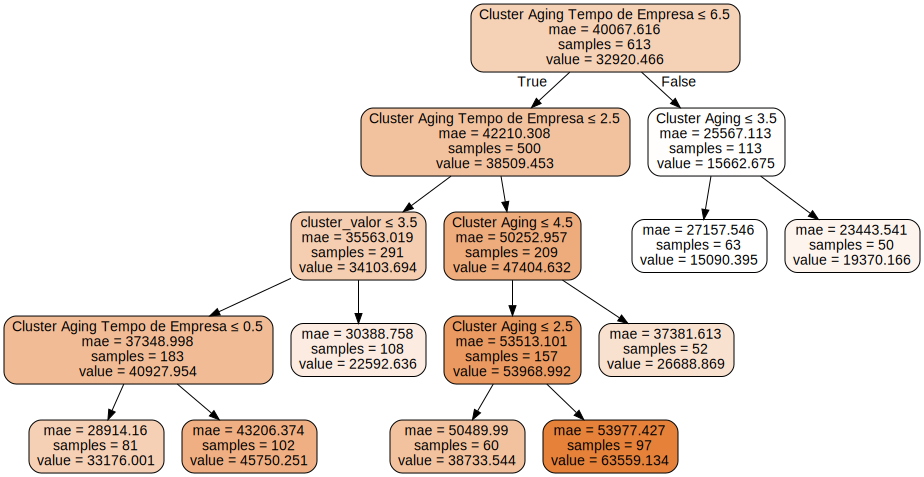

In [145]:
#Gera o gráfico da árvore de decisão e plota na tela
graph_data = tree.export_graphviz(DT, out_file=None, 
                                  feature_names=explicativas_cargo[['cluster_valor', 'Cluster Aging Tempo de Empresa', 'Cluster Aging', 'safra_reclamacao']].columns,
                                  filled=True, rounded=True,  
                                  special_characters=True)  
graph = graphviz.Source(graph_data)  
graph 



In [125]:
#Salva a árvore de devisão. O formato padrão do graphviz é o dot - vetorial -, então precisamos executar uma função que converte o formato para .png
graph.save('decision_tree_desindexado_GERENTE.dot')
!dot -Tpng decision_tree_desindexado_GERENTE.dot -o decision_tree_desindexado_GERENTE.png

In [146]:
y_true = resposta_cargo['Pagamento Desindexado']
#y_pred = valor previsto pelo modelo treinado
y_pred = DT.predict(explicativas_cargo[['cluster_valor', 'Cluster Aging Tempo de Empresa', 'Cluster Aging','safra_reclamacao']])

In [147]:
#Calcula o R-quadrado
r2_score(y_true, y_pred)

-0.007851412428869109

In [148]:
#Calcula o MAPE
mean_absolute_percentage_error(y_true, y_pred)

4.662588521628518

In [149]:
#Calcula o MAE
mean_absolute_error(y_true, y_pred)

37721.43417845121

In [150]:
#Aplicação da predição no dataframe do estoque para obtenção dos valores de predição
dados_estoque_full = estoque_cargo
dados_estoque_full['prediction'] = DT.predict(explicativas_estoque[['cluster_valor', 'Cluster Aging Tempo de Empresa', 
                                                                    'Cluster Aging','safra_reclamacao']])

<ipython-input-150-aae68851d955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_estoque_full['prediction'] = DT.predict(explicativas_estoque[['cluster_valor', 'Cluster Aging Tempo de Empresa',


In [151]:
#Gera o recorte precificado do cargo utilizado
estoque_cargo.to_excel('Estoque_Ajudante_Fev.xls')

<ipython-input-151-5721d2b012ae>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  estoque_cargo.to_excel('Estoque_Ajudante_Fev.xls')
